In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [3]:
 # Import test and train datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
# Determine the length of each data set to identify the percentages of train versus test
len_df_train = len(df_train)
len_df_test = len(df_test)
len_total_df = len_df_train + len_df_test
perc_df_train = (len_df_train / len_total_df) * 100.0
perc_df_test = (len_df_test / len_total_df) * 100.0
print('total data: {} records; train: {} records ({:.2f}%); test: {} records ({:.2f}%)'
      .format(len_total_df, len_df_train, perc_df_train, len_df_test, perc_df_test))

total data: 1309 records; train: 891 records (68.07%); test: 418 records (31.93%)


In [5]:
# View first 5 lines of training data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Using the .info method, it is noted that Age, Cabin and Embarked have missing or null values
# If any of these features are to be used, they should be handled
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# Using the .describe method, summary statistics of the numeric columns are displayed
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


non-survivors: 549; survivors: 342


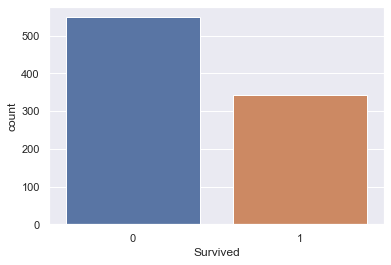

In [8]:
# Determine how many non-survivors and survivors are in the train data
sum_survivors = df_train['Survived'].sum()
print('non-survivors: {}; survivors: {}'.format(len_df_train - sum_survivors, sum_survivors))

# Use sns to plot 'Survived' in the train data
sns.countplot(x='Survived', data=df_train)

Sex
female    314
male      577
Name: Sex, dtype: int64


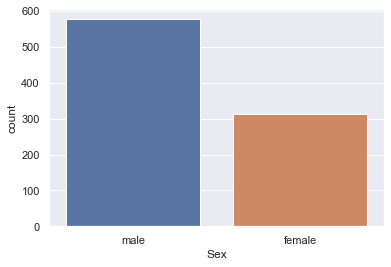

In [9]:
# Determine how many passengers are male and female in the train data
print(df_train.groupby(['Sex']).Sex.count())

# Use sns to plot 'Sex' in the train data
sns.countplot(x='Sex', data=df_train)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64


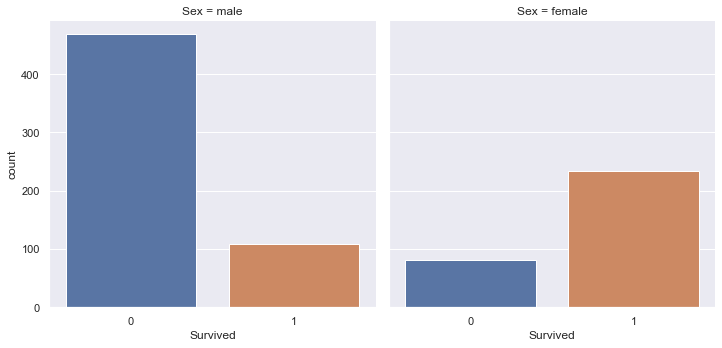

In [10]:
# Determine how many survivors and non-survivors by sex
print(df_train.groupby(['Sex', 'Survived']).Sex.count())

# Use sns to plot the Survived by Sex as a category plot
sns.catplot(x='Survived', col='Sex', kind='count', data=df_train)

In [11]:
# Display the summary statistics for fare by survival and non-survival
df_train.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


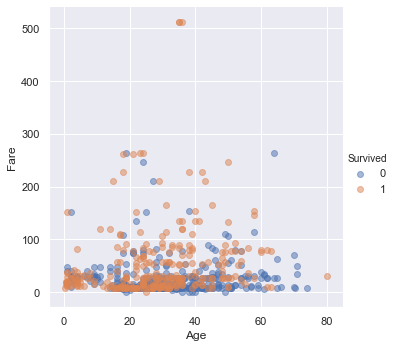

In [12]:
# Use sns to create a scatterplot based on Age and Fare, colored by Survived
sns.lmplot(x='Age', y='Fare', hue='Survived', data=df_train, fit_reg=False, scatter_kws={'alpha':0.5})